In [6]:
import numpy as np
import scipy.stats as sp

<b>Create Equity Class </b>
<br>
Member Functions
<ul>
<li> delta
<li>marketvalue
<li>theovalue
</ul>

In [7]:
class Equity:
    def __init__(self,s,n=0):
        """
        Equity Object
        s = share price
        n = nbr of shares in position
        """
        self.price = s
        self.n = n
    
    def delta(self):
        return 1
    
    def marketvalue(self):
        return self.theovalue() * self.n
    
    def theovalue(self):
        return self.price
    
    def totaldelta(self):
        return self.n * self.s * self.delta()

<b> European Call Option</b> (derived from Equity)<br>
<br>
$\Delta=\frac{\partial P}{\partial S} \sim \frac{\Delta P}{\Delta S}$

In [42]:
class EuCall(Equity):
    def __init__(self,t, s, k, r, q, v,n):
        """
        t = maturity
        s = spot price (underlying)
        k = strike
        r = interest rate
        q = div yield
        v = volatility
        n = nbr of options
        Example : EuCall(5,100,100,0.03,0.01,0.4,100)
        """
        self.s = s
        self.t = t
        self.k = k
        self.r = r
        self.q = q
        self.v = v
        self.n = n
    
    def __str__(self):
        return str(self.n)+"x"+" EUCALL Strike=" + str(self.k)
    
    def theovalue(self):
        if self.t <= 0:
            return max(self.s - self.k, 0)
        else:
            d1 = (1/(self.v*np.sqrt(self.t))) * (np.log(self.s/self.k)+ (self.r-self.q+0.5*self.v**2)*self.t)
            d2 = d1 - self.v*np.sqrt(self.t)
            return self.s*np.exp(-self.q*self.t)*sp.norm().cdf(d1)-sp.norm().cdf(d2)*self.k*np.exp(-self.r*self.t)
        
    def delta(self):
        s0 = self.s
        s_plus = self.s*1.001
        s_minus = self.s*(0.999)
        
        self.s = s_plus
        theovalue_plus = self.theovalue()
        self.s = s_minus
        theovalue_minus = self.theovalue()
        
        self.s = s0
    
        return (theovalue_plus - theovalue_minus)/(s_plus-s_minus)
    

<b>Create Portfolio Object</b>
<br>
Methods:
<ul>
<li>add 
<li>clear
<li>totaldelta
<li>marketvalue
</ul>

In [27]:
class Portfolio:
    def __init__(self):
        self.holding = []
    def add(self,asset):
        self.holding.append(asset)
    
    def clear(self):
        self.holding = []
    
    def marketvalue(self):
        mv = 0
        for o in self.holding:
            mv += o.marketvalue()
        return mv
    
    def totaldelta(self):
        delta = 0
        for o in self.holding:
            delta += o.totaldelta()
        return delta
    
    def set_underlying(self,s):
        for o in self.holding:
            o.s = s
    

In [13]:
a = EuCall(1,100,100,0.03,0.01,0.4,1)

In [34]:
delta.shape

(10,)

In [52]:
stock = np.arange(50.0,150.0,10)
call = np.zeros_like(stock)
delta = stock*0.0001

for i in np.arange(0,len(stock)):
    a = EuCall(5,stock[i],100,0.03,0.01,0.4,1)
    call[i] = a.theovalue()
    delta[i] = a.delta()

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

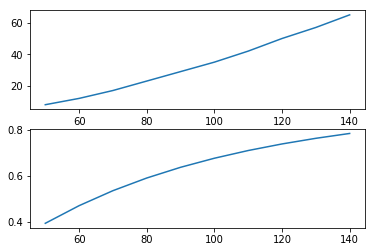

In [51]:
fig,ax = plt.subplots(2,1)
ax[0].plot(stock,call)
ax[1].plot(stock,delta)

In [40]:
delta

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])